> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

%matplotlib inline

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
pio.templates.default = "plotly_white"

anos_base = np.repeat(np.arange(1990, 2024, 4), 10)
n_linhas = len(anos_base)
data_mock = {
    'ano': anos_base,
    'comparecimento': np.random.randint(0, 80000, n_linhas),
    'gols_1': np.random.randint(0, 5, n_linhas),
    'gols_2': np.random.randint(0, 5, n_linhas),
    'time_1': np.random.choice(['Brasil', 'Alemanha', 'EUA', 'França'], n_linhas),
    'time_2': np.random.choice(['Argentina', 'Japão', 'Espanha', 'Suécia'], n_linhas),
    'copa': np.random.choice(['Masculina', 'Feminina'], n_linhas),
    'cartao_amarelo_1': ['1,1'] * n_linhas,
    'cartao_amarelo_2': ['1'] * n_linhas,
    'cartao_vermelho_1': ['0'] * n_linhas,
    'cartao_vermelho_2': ['0'] * n_linhas,
    'gols_1_contra': [None] * n_linhas,
    'gols_2_contra': [None] * n_linhas
}
wc = pd.DataFrame(data_mock)

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [4]:
# Preparação dos dados
df_q2 = wc[wc['comparecimento'] > 0]

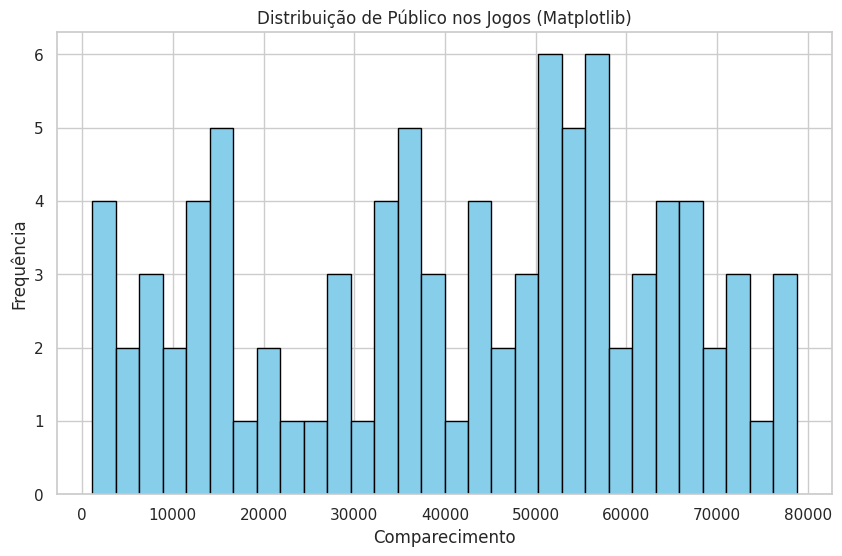

In [5]:
# Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_q2['comparecimento'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição de Público nos Jogos (Matplotlib)')
plt.xlabel('Comparecimento')
plt.ylabel('Frequência')
plt.show()

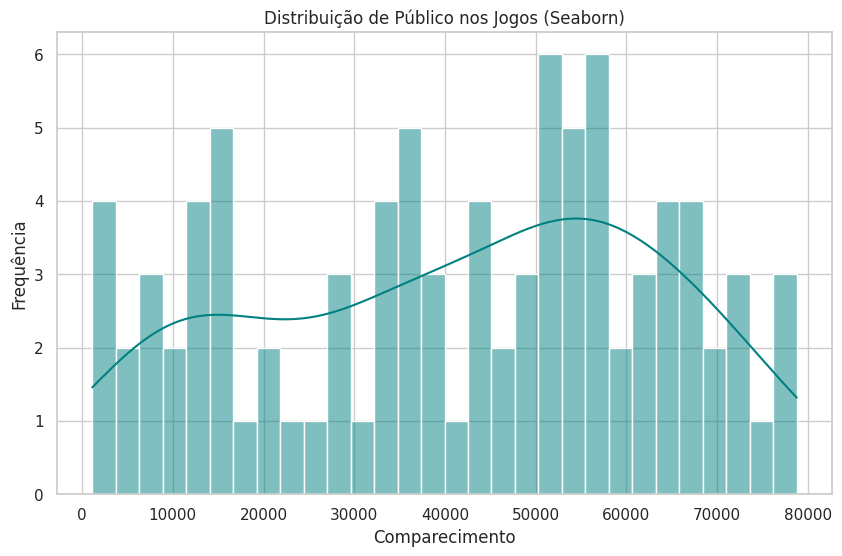

In [6]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_q2['comparecimento'], bins=30, kde=True, color='teal')
plt.title('Distribuição de Público nos Jogos (Seaborn)')
plt.xlabel('Comparecimento')
plt.ylabel('Frequência')
plt.show()

In [7]:
# Plotly
fig2 = px.histogram(df_q2, x="comparecimento", nbins=30,
                   title="Distribuição de Público nos Jogos (Plotly)",
                   labels={'comparecimento': 'Público', 'count': 'Frequência'})
fig2.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [8]:
# Preparação dos dados com distorção (jitter)
gols_jitter = wc[['gols_1', 'gols_2']] + np.random.random((len(wc), 2)) * 0.5

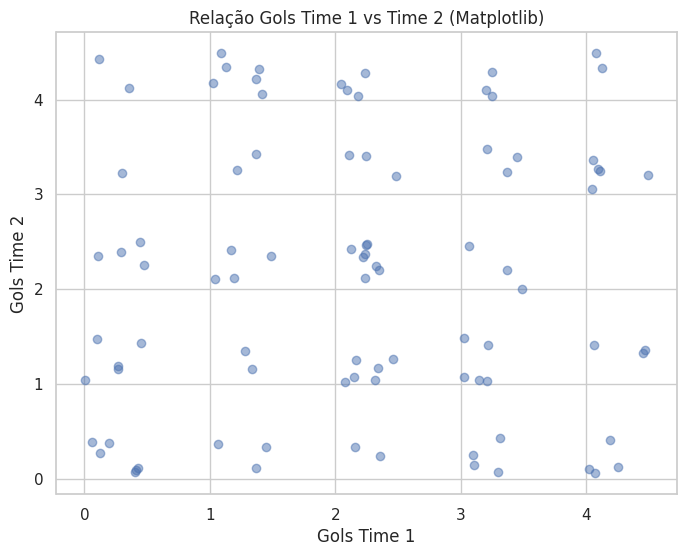

In [9]:
# Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(gols_jitter['gols_1'], gols_jitter['gols_2'], alpha=0.5)
plt.title('Relação Gols Time 1 vs Time 2 (Matplotlib)')
plt.xlabel('Gols Time 1')
plt.ylabel('Gols Time 2')
plt.show()

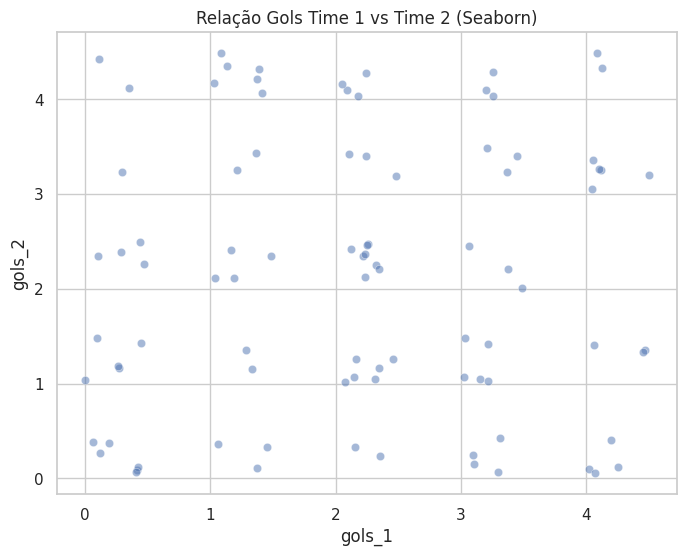

In [10]:
# Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gols_jitter['gols_1'], y=gols_jitter['gols_2'], alpha=0.5)
plt.title('Relação Gols Time 1 vs Time 2 (Seaborn)')
plt.show()

In [11]:
# Plotly
fig3 = px.scatter(gols_jitter, x='gols_1', y='gols_2', opacity=0.5,
                 title='Relação Gols Time 1 vs Time 2 (Plotly)')
fig3.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [12]:
# Preparação dos dados
paises = pd.concat([wc[['time_1', 'copa']].rename(columns={'time_1': 'pais'}),
                    wc[['time_2', 'copa']].rename(columns={'time_2': 'pais'})])
top_10_stats = paises.groupby(['pais', 'copa']).size().unstack(fill_value=0)
top_10_stats['total'] = top_10_stats.sum(axis=1)
top_10_stats = top_10_stats.sort_values('total', ascending=False).head(10).drop(columns='total')
df_sns = top_10_stats.reset_index().melt(id_vars='pais')

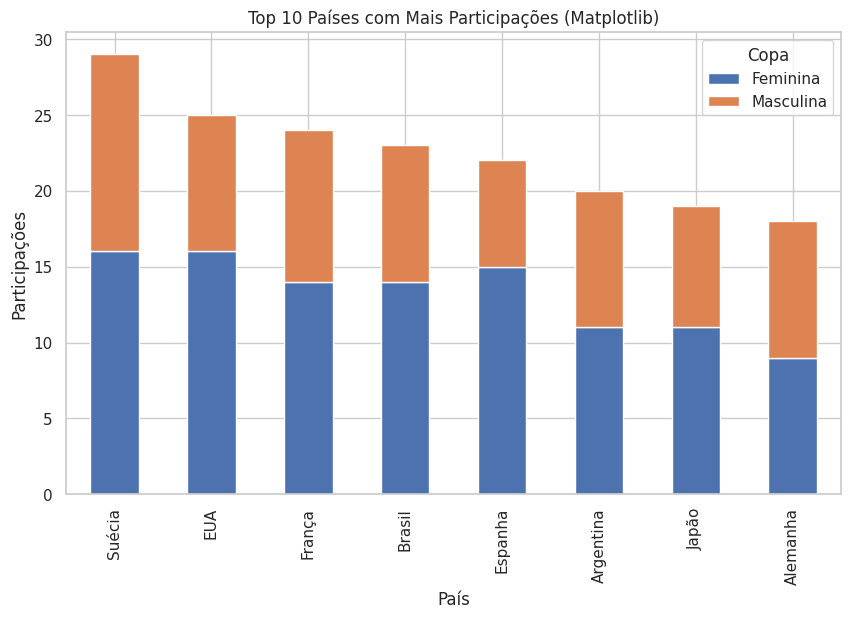

In [13]:
# Matplotlib
top_10_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Países com Mais Participações (Matplotlib)')
plt.xlabel('País')
plt.ylabel('Participações')
plt.legend(title='Copa')
plt.show()

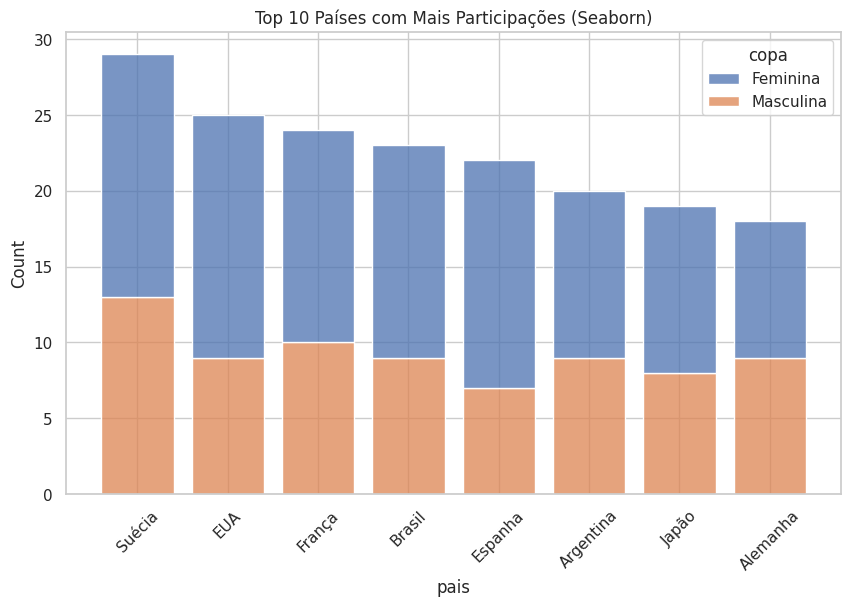

In [14]:
# Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sns, x='pais', weights='value', hue='copa', multiple='stack', shrink=0.8)
plt.title('Top 10 Países com Mais Participações (Seaborn)')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Plotly
fig4 = px.bar(df_sns, x='pais', y='value', color='copa',
             title='Top 10 Países com Mais Participações (Plotly)')
fig4.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

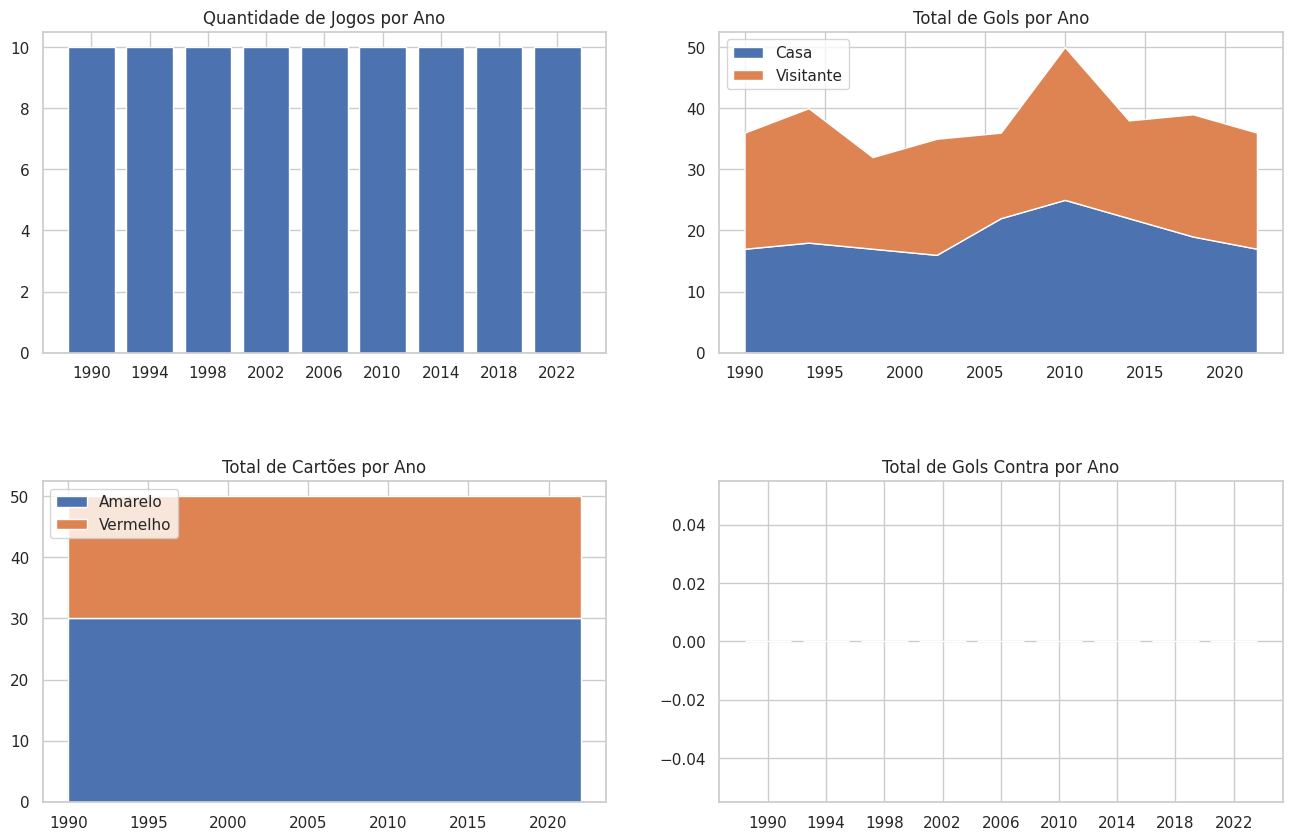

In [16]:
def limpar_contagem(coluna):
    return wc[coluna].str.split(',').str.len().fillna(0).astype(int)

wc['ca_total'] = limpar_contagem('cartao_amarelo_1') + limpar_contagem('cartao_amarelo_2')
wc['cv_total'] = limpar_contagem('cartao_vermelho_1') + limpar_contagem('cartao_vermelho_2')
wc['gc_total'] = wc['gols_1_contra'].notna().astype(int) + wc['gols_2_contra'].notna().astype(int)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)

jogos_ano = wc['ano'].value_counts().sort_index()
axs[0, 0].bar(jogos_ano.index.astype(str), jogos_ano.values)
axs[0, 0].set_title('Quantidade de Jogos por Ano')

gols_ano = wc.groupby('ano')[['gols_1', 'gols_2']].sum()
axs[0, 1].stackplot(gols_ano.index, gols_ano['gols_1'], gols_ano['gols_2'], labels=['Casa', 'Visitante'])
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('Total de Gols por Ano')

cartoes_ano = wc.groupby('ano')[['ca_total', 'cv_total']].sum()
axs[1, 0].stackplot(cartoes_ano.index, cartoes_ano['ca_total'], cartoes_ano['cv_total'], labels=['Amarelo', 'Vermelho'])
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('Total de Cartões por Ano')

gc_ano = wc.groupby('ano')['gc_total'].sum()
axs[1, 1].bar(gc_ano.index.astype(str), gc_ano.values)
axs[1, 1].set_title('Total de Gols Contra por Ano')

plt.show()